# Lab 2

In [1]:
# Imports (should be alphabetized)

# # Characterizing the number of nucleotides (non-standard import name)
# import Bio

# File I/O
import os

# Unzipping
import gzip

# Plotting
import matplotlib.pyplot as plt
import numpy as np

# Regular expressions
import re

# Getting a chromosome from GenBank (Ensembl)
import requests

# Shell copying
import shutil

In [3]:




# --- !!! IMPORTANT !!! --- #




# Set the working directory.

# Path must be absolute, cannot use '~/analyses'.
os.chdir('/home/aeros/analyses/lab_2')





In [4]:
# Get the chromomosome of interest.
r = requests.get(
    'http://ftp.ensembl.org/pub/release-107/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.MT.fa.gz'
)

with open('MT.gz', 'wb') as f:
    f.write(r.content)

In [5]:
# Unzip the download.
with gzip.open('MT.gz', 'rb') as f_in:
    with open('MT.fz', 'wb') as f_out:
        shutil.copyfileobj(f_in,f_out)

# Load the file.
with open('MT.fz', 'r') as s:
    sequence = s.readlines()

# Get rid of header.
sequence = sequence[1:]

# Strip the newlines and join.
sequence = ''.join([i.strip() for i in sequence])

In [6]:
# Define "CpG island".

# (Testing)
# region_length = 10
region_length = 250
cg_content_cutoff = 0.5

In [7]:
# Define a function to calculate observed-to-expected CG content.
# Source: https://en.wikipedia.org/wiki/CpG_site#CpG_islands
def ote(
    n_c, 
    n_g, 
    s_l
):
    
    # n_c - # of Cs
    # n_g - # of Gs
    # s_l - sequence length
    
    return (n_c*n_g)/s_l

In [8]:
# Main search process

# Go through the sequence
# using the region length to
# find Cs and Gs, noting the 
# start and stop of each island.
#
# We need to account for matches that overlap,
# and keep distances between end of one region
# and beginning of a second region.

In [9]:
# Define a list which will hold CpG island
# information.

# The list consists of tuples, where the first
# coordinate is the start of the CpG island
# and the second coordinate is the end of
# the CpG island.
CpG_islands = []

In [10]:
# Search each chunk of the sequence, where the chunk
# size is region_length.
for i in range(0, len(sequence)-region_length):
    
    # Start by assuming no C or G content.
    c_content = 0
    g_content = 0
    
    # If we find an island, then we need to know
    # where it starts and stops.
    min_c_position = -1
    min_g_position = -1
    max_c_position = -1
    max_g_position = -1
    
    # Search the region for C or G.
    for m in re.finditer('C|G', sequence[i:i+region_length]):
        
        # If we match C or G, add to the respective
        # C or G content.
        if m.group() == 'C':
            
            # Add C content.
            c_content += 1
            
            # This block only runs on the first C hit.
            if min_c_position == -1:
                min_c_position = m.start() + i
            
            # This block runs on every C hit.
            if m.start() > max_c_position:
                max_c_position = m.start() + i
            
        else:
            
            # Add G content.
            g_content += 1
            
            # This block only runs on the first G hit.
            if min_g_position == -1:
                min_g_position = m.start() + i
            
            # This block runs on every G hit.
            if m.start() > max_g_position:
                max_g_position = m.start() + i
    
    # Both c_content and g_content must be > 0 in order
    # for there to be a CpG island.
    if c_content > 0 and g_content > 0:
        
        # Now check to see if we have an actual CpG island.
        if (c_content + g_content)/region_length >= cg_content_cutoff and ote(n_c = c_content, n_g = g_content, s_l = region_length) >= 0.6:
            
            # (Optional)
            # See what's getting added.
            # print(sequence[i:i+region_length])
            # print(min(min_c_position, min_g_position), max(max_c_position, max_g_position))
            
            # We have a CpG island, so record the start and stop positions.
            CpG_islands.append((min(min_c_position, min_g_position), max(max_c_position, max_g_position)))

# print(CpG_islands)

In [11]:
# Now take UNIQUE CpG islands.  Why?

# We need to keep the islands in order (why?),
# so we can't use CpG_islands = list(set(CpG_islands))

# Instead, we'll use a slower solution.
unique_CpG_islands = []

for island in CpG_islands:
    if island not in unique_CpG_islands:
        unique_CpG_islands.append(island)

# (Optional)
print(unique_CpG_islands)

[(294, 315), (295, 315), (302, 315), (303, 315), (1127, 1129), (1129, 1130), (1130, 1133), (2469, 2473), (2483, 2491), (2487, 2491), (2488, 2491), (3302, 3314), (3305, 3314), (3309, 3314), (3310, 3314), (3311, 3314), (3314, 3316), (3320, 3336), (3321, 3336), (3323, 3336), (3324, 3336), (3327, 3336), (3329, 3336), (3330, 3336), (3332, 3336), (3336, 3339), (3339, 3351), (3340, 3351), (3341, 3351), (3345, 3351), (3350, 3351), (3351, 3352), (3352, 3356), (3356, 3358), (3357, 3358), (3358, 3368), (3362, 3368), (3363, 3368), (3368, 3369), (3369, 3375), (3373, 3375), (3374, 3375), (3375, 3378), (3378, 3379), (3379, 3387), (3387, 3390), (3390, 3392), (3391, 3392), (3392, 3406), (3399, 3406), (3402, 3406), (3405, 3406), (3406, 3407), (3407, 3411), (3411, 3413), (3412, 3413), (3413, 3420), (3414, 3420), (3415, 3420), (3416, 3420), (3419, 3420), (3420, 3428), (3423, 3428), (3426, 3428), (3427, 3428), (3428, 3435), (3429, 3435), (3430, 3435), (3431, 3435), (3434, 3435), (3435, 3438), (3436, 3438),

In [12]:




# --- OLD --- #




# # We need to look for overlapping CpG islands to
# # combine them.

# # This isn't as hard as it sounds - the main thing
# # is that we need to look at the distance between
# # consecutive CpG islands and see if this distance
# # is less than or equal to region_length.

# # Define a new variable which will combine CpG islands
# # when this condition is true.
# unique_CpG_islands_combined = []

# # Two cases

# # (Edge case) We have only one CpG island.
# if len(unique_CpG_islands) == 1:
    
#     # Simply store the only CpG island we have.
#     unique_CpG_islands_combined.append(unique_CpG_islands[0])

# # (Typical case) We have at least two CpG islands.
# else:
    
#     # We will go over each CpG island, starting with
#     # the second one, and determine if the next upstream
#     # island is within region_length.  If so, combine
#     # this island and the next.  If not, split this island
#     # off.
    
#     # Create a helper variable to help us stored combined islands
#     combined_helper = []
    
#     # Loop until the last island.
#     for i in range(1, len(unique_CpG_islands)-1):
        
#         # Is the distance between this island and the next
#         # greater than region_length?
        
#         # Simply calculate the distance between islands as we move through
#         # the list of them.
        
#         # Always start by appending the current island.
#         combined_helper.append(unique_CpG_islands[i])
        
#         # unique_CpG_islands[i+1][0] is the beginning of the i+1-th island
#         # unique_CpG_islands[i][1] is the end of the i-th island
#         if unique_CpG_islands[i+1][0] - unique_CpG_islands[i][1] + 1 > region_length:
            
#             # TODO: fix 3-14 CpG island?
            
#             # (Comment to show overlaps) Take the extremal points of combined_helper and
#             # make a new, combined island.
#             # unique_CpG_islands_combined.append((combined_helper[0][0], combined_helper[-1][1]))
            
#             # (Uncomment to show overlaps) Append the combined helper and reset it.
#             unique_CpG_islands_combined.append(combined_helper)
            
#             combined_helper = []
    
# # (Optional)
# for island in unique_CpG_islands_combined:
#     print(island)



# --- NEW --- #




# Preserving variable names here...
unique_CpG_islands_combined = unique_CpG_islands

In [13]:
# Let's define a function which will calculate the
# distance between two given islands.
def distance_between_islands(
    island_one,
    island_two
):
    
    # island_one - a tuple which has start and stop positions
    # island_two - ibid.
    
    return island_two[0]-island_one[1]

# The part you should complete (what code from class examples can we use?)

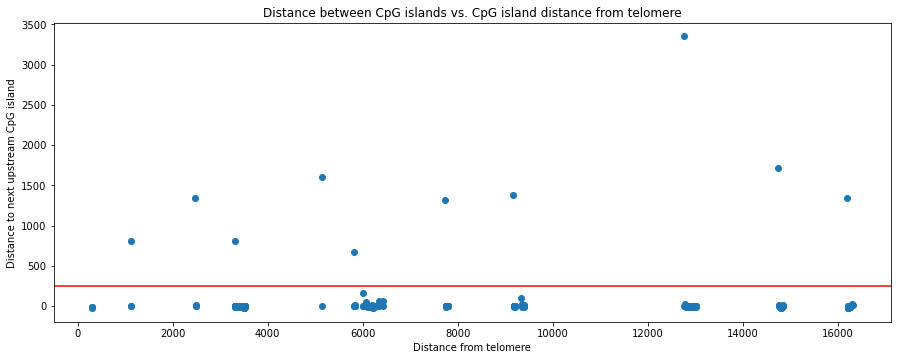

In [14]:
# Plot 1 - scatter plot

# Note: a scatter plot only makes sense if we have more than
# one CpG island.  Why?

# Source (first example): https://www.w3schools.com/python/matplotlib_scatter.asp
# Source (Example 1, plot size): https://pythonguides.com/matplotlib-increase-plot-size/#:~:text=Matplotlib%20increase%20plot%20size%20jupyter,-In%20this%20section&text=By%20default%2C%20the%20width%20is%206.4%20and%20the%20height%20is%204.8.

# Adjust the plot size.
plt.rcParams['figure.figsize'] = (15,5.5)

# Create an x and a y list.
x = []
y = []

# Start on the *second* island.

# Why do we use a range command here?
for i in range(1, len(unique_CpG_islands_combined)):
    
    # Establish island one and two.
    i_one = unique_CpG_islands_combined[i-1]
    i_two = unique_CpG_islands_combined[i]
    
    # Add the x-coordinate to x.
    x.append(i_two[0])
    
    # Add the y-coordinate to y.
    y.append(
        distance_between_islands(
            island_one = i_one,
            island_two = i_two
        )
    )

# Make the arrays and plot.
x = np.array(x)
y = np.array(y)

plt.scatter(x, y)

# Horizontal line at region_length.
# Source: https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/
plt.axhline(y = region_length, color = 'r', linestyle = '-')

plt.title ('Distance between CpG islands vs. CpG island distance from telomere')
plt.xlabel ('Distance from telomere')
plt.ylabel ('Distance to next upstream CpG island')
plt.show()

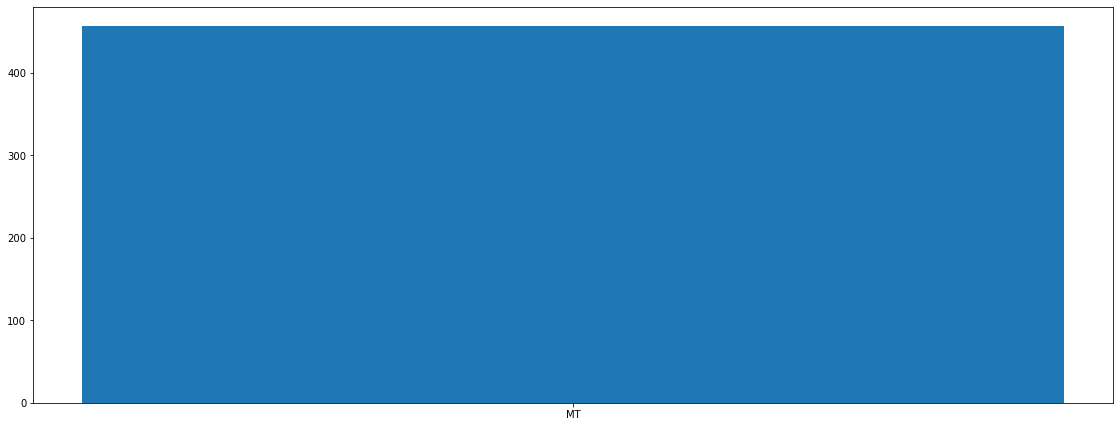

In [15]:
# Plot 2 - bar plot

# Source: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

# Note: we only have one chromosome to plot for this example.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
chromosome = ['MT']
n_cpg_islands = [len(unique_CpG_islands_combined)]
ax.bar(chromosome,n_cpg_islands)
plt.show()

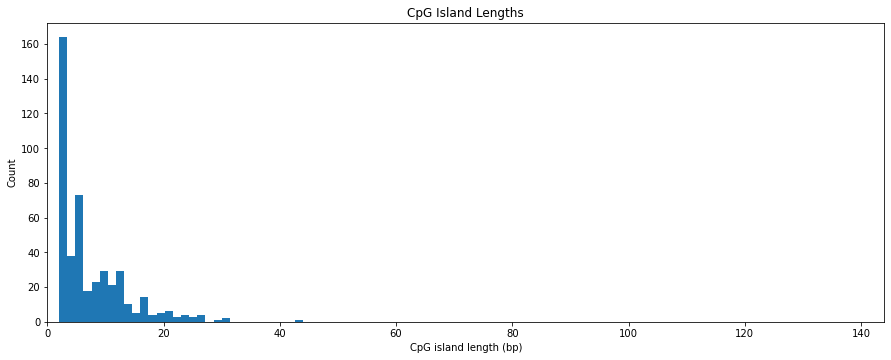

In [16]:
# Plot 3 - histogram

# Source: L2-2DViz-Sequencing-Plots notebook from Lecture 2

# Define variables to hold the island lengths
# and the largest island length.
island_lengths = []
max_island_length = 0

# Go over each island.
for island in unique_CpG_islands_combined:
    
    # What is the island length?
    island_length = island[1]-island[0]+1
    
    # Save it.
    island_lengths.append(island_length)
    
    # Is this island the longest?
    if island_length > max_island_length:
        max_island_length = island_length

# Plot.
plt.hist(island_lengths, bins=30)
plt.title ('CpG Island Lengths')
plt.xlabel('CpG island length (bp)')
plt.ylabel('Count')

# Give a little bit of room on the right side of
# the x-axis.
plt.xlim(0, max_island_length + 100)

plt.show()